In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import ELPH
import ELPH_utils

derrom_path = "../../"
data_path = "../../../data/"

import sys
sys.path.append(derrom_path)

import derrom

In [2]:
system = ELPH.ELPH(kmax=2.0, n_kmax=200)

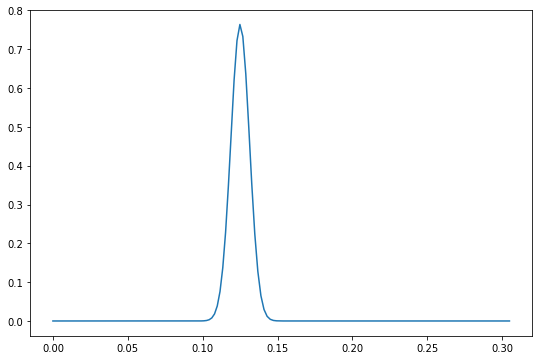

In [3]:
# inits = system.get_init_cond_gauss(max_pos = 0.2, width = 0.0125, density=0.025)
inits = system.get_init_cond_gauss(max_pos = 0.5/4, width = 0.025/4, density=0.05/4)

plt.plot(system.E_el_vec,inits[:system.n_kmax])
plt.show()

In [5]:
trajectory = system.get_full_trajectory(inits, tmax=2000, n_tmax=400)

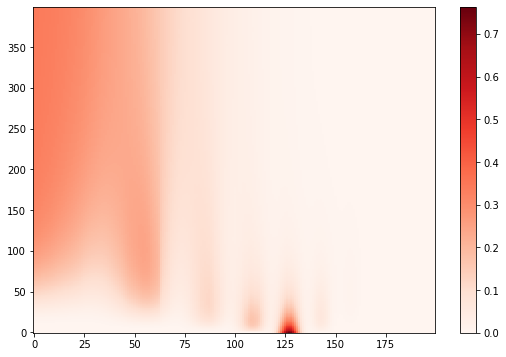

In [6]:
el_trajectory = trajectory[:,:system.n_kmax]

plt.imshow(el_trajectory, aspect='auto', interpolation='none', origin='lower',cmap='Reds')
plt.colorbar()
plt.show()

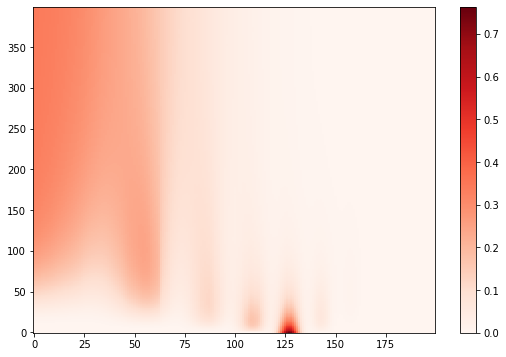

In [7]:
el_trajectory = system.get_electron_trajectory(inits, tmax=2000, n_tmax=400)

plt.imshow(el_trajectory, aspect='auto', interpolation='none', origin='lower',cmap='Reds')
plt.colorbar()
plt.show()

In [30]:
ELPH_utils.save_trajectories([el_trajectory], data_path+'example_trajectory')

In [8]:
model = derrom.utils.load_model(data_path+'model.obj')

full_hist:  False
intercept:  True
standardize:  True
rdim:  20
DE_l:  2
weights shape:  (441, 20)


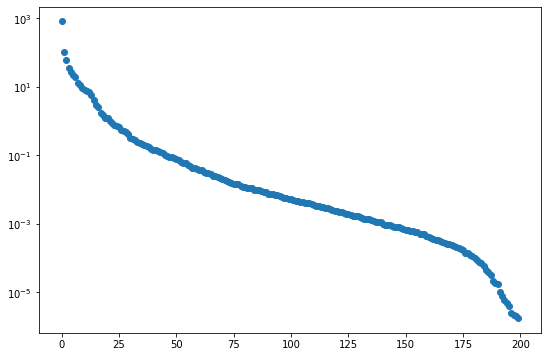

In [9]:
model.print_status()

plt.semilogy(model.dim_reducer.S,'o')
plt.show()

In [10]:
pred = model.predict(el_trajectory)

print('rms error: ', model.get_error(el_trajectory, pred=pred, norm='rms') )
print('max error: ', model.get_error(el_trajectory, pred=pred, norm='max') )

rms error:  0.017415283802663134
max error:  0.08929178220494723
